#### SciPy
수치해석기능을 제공하는 파이썬 패키지

#### stats
SciPy의 서브 패키지로, 확률분포 분석을 위한 다양한 기능 제공

In [5]:
import scipy as sp
from scipy import stats

# 1. 확률분포 클래스
* SciPy 확률분포 기능을 사용하려면 우선 해당 확률분포에 대한 확률분포 클래스 객체를 생성 후 객체의 메서드를 호출해야 한다.

| 종류 | 이름 | 확률분포 |
|------|------|----------|
|이산 | `bernoulli` | 베르누이 분포 | 
|이산 | `binom` | 이항 분포 | 
|이산 | `multinomial` | 다항 분포 | 
|연속 | `uniform` | 균일 분포 | 
|연속 | `norm` | 가우시안 정규 분포 | 
|연속 | `beta` | 베타 분포 | 
|연속 | `gamma` | 감마 분포 | 
|연속 | `t` | 스튜던트 t분포 | 
|연속 | `chi2` | 카이 제곱 분포 | 
|연속 | `f` | F 분포 | 
|연속 | `dirichlet` | 디리클리 분포 | 
|연속 | `multivariate_normal` | 다변수 가우시안 정규 분포 | 

In [6]:
# 가우시안 정규 분포 객체 생성
rv = sp.stats.norm()
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

# 1.1. 모수 지정
* 확률분포 객체 생성 시에는 분포의 형상을 구체적으로 지정하는 모수(parameter)를 인수로 지정해 주어야 한다.
* 각 확률분포마다 지정해 주어야 할 모수의 종류가 다르므로 자세한 설명은 SciPy 문서 참조
* 공통적으로 가진 모수 인수

| 인수 | 의미 |
|------|------|
|`loc` | 일반적으로 분포의 기댓값 |
|`scale` | 일반적으로 분포의 표준편차 |

In [14]:
# 기댓값이 1이고 표준 편차가 2인 정규 분포 객체 생성
rv = sp.stats.norm(loc=1, scale=2)
rv

# 2. 확률분포 메서드

| 메서드 | 기능 |
|--------|------|
|`pmf` | 확률질량함수(probability mass function) | 
|`pdf` | 확률밀도함수(probaility density function) | 
|`cdf` | 누적분포함수(cumulative distribution function) | 
|`ppf` | 누적분포함수의 역수 (inverse cumulative distribution function) | 
|`sf` | 생존함수 (1 - 누적분포함수) (survival function) | 
|`isf` | 생존함수의 역함수 (inverse survival function) | 
|`rvs` | 랜덤 표본 생성 (random variable sampling) | 

## 2.1. 확률밀도함수

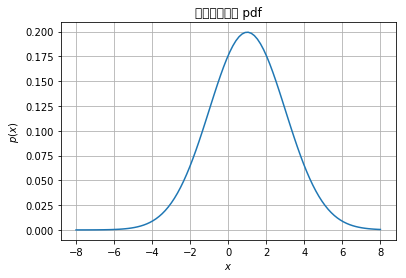

In [15]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)

plt.plot(xx, pdf)
plt.title("확률밀도함수 pdf")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.grid()
plt.show()

## 2.2. 누적분포함수

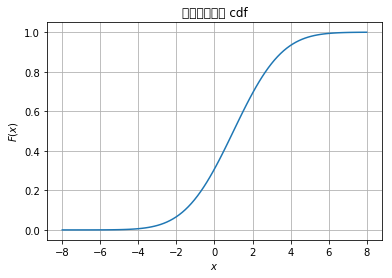

In [18]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)

plt.plot(xx, cdf)
plt.title("누적분포함수 cdf")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.grid()
plt.show()

# 2.3. 랜덤 표본 생성
`rvs` 메서드를 사용하며 다음 인수를 갖는다.

| 인수 | 의미 |
|------|------|
|`size` | 표본 생성시 생성될 표본의 크기 |
|`random_state` | 표본 생성시 사용되는 시드(seed) 값 |

In [19]:
rv.rvs(size=(3, 5), random_state=0)

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

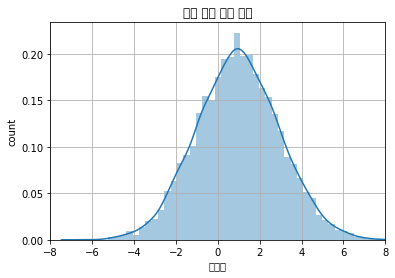

In [21]:
import seaborn as sns

sns.distplot(rv.rvs(size=10000, random_state=0))
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("count")
plt.xlim(-8, 8)
plt.grid()
plt.show()

## 연습 문제
`rvs` 명령으로 $N$개의 정규 분포의 표본 데이터를 생성하고 이 표본 데이터로부터 표본평균과 비편향 표본분산을 계산하라. 이 값이 인수로 넣은 기댓값과 분산과 비슷한지 비교하라.  
1. $N=10$인 경우  
2. $N=10000$인 경우

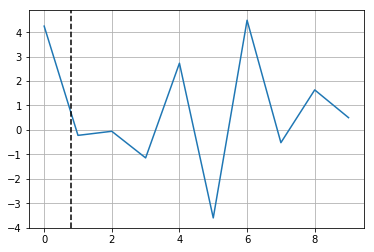

In [26]:
n10 = rv.rvs(size=10, random_state=1)
plt.plot(n10)
plt.axvline(np.mean(n10), ls="--", c="k")
plt.grid()

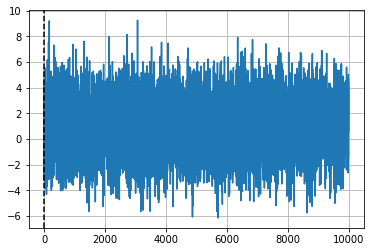

In [30]:
n10000 = rv.rvs(size=10000, random_state=2)
plt.plot(n10000)
plt.axvline(np.mean(n10000), ls="--", c="k")
plt.grid()